# 목차

1. 라이브러리 불러오기
2. 데이터 불러오기
3. datetime 컬럼 자료형 변환하고, 연, 월, 일, 시, 분, 초 6가지 컬럼 생성
4. year, hour ... second 6가지 데이터 시각화하기
5. 데이터 전처리 and 데이터 분할  
    5.1 데이터 전처리  
    5.2 데이터 분할  
6. Linear Regression 모델 학습
7. 모델 예측값 및 손실함수(RMSE, MSE) 계산
8. 시각화
9. 회고

# 1. 라이브러리 불러오기

In [301]:
import os                                                 # 시스템 접근 라이브러리
from sklearn.model_selection import train_test_split      # 데이터셋을 train, test로 분할 라이브러리 
from sklearn.linear_model import LinearRegression         # 선형회귀 모델 라이브러리
from sklearn.metrics import mean_squared_error            # MSE, RMSE 평가 라이브러리 불러오기
import seaborn as sns                                     # seaborn 라이브러리 불러오기

import pandas as pd                                       # pandas 라이브러리 불러오기
import numpy as np                                        # numpy 라이브러리 불러오기
import matplotlib.pyplot as plt                           # matplotlib.pyplot 라이브러리 불러오기

# 화면에 그래프를 바로 볼 수 있게 해줌
%matplotlib inline
# 더높은 해상도로 출력
%config InlineBackend.figure_format = 'retina'

# 2. 데이터 불러오기

In [302]:
# 1.1 데이터 가져오기/불러오기

dir_path = os.getenv("HOME") + "/data/data/bike-sharing-demand"   # 홈 디렉토리 + 경로
train_file_path = os.path.join(dir_path, 'train.csv')             # 위에서 만든 경로 + 파일명.확장자명
train = pd.read_csv(train_file_path)                              # 파일 불러와 DataFrame으로 변환
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### 데이터 이해하기

datetime - 날짜 및 시간  
season -  1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울   
holiday - 휴일/공휴일 유무  
workingday - 주말도 공휴일도 아닌 날  
weather -  
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy   
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist   
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds   
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  

temp - 섭씨 온도  
atemp - 기분 좋은 섭씨 온도 ("feels like" temperature in Celsius)  
humidity - 상대 습도  
windspeed - 풍속  
casual - 비회원수 (number of non-registered user rentals initiated)  
registered - 회원수 (number of registered user rentals initiated)  
count - 대여수 (number of total rentals)  


# 3. datetime 컬럼 자료형 변환하고, 연, 월, 일, 시, 분, 초 6가지 컬럼 생성

In [303]:
train['datetime'] = pd.to_datetime(train['datetime'])          # train 데이터프레임의 datetime컬럼 타입을 object에서 datetime64로 변경
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [304]:
# datetiem 컬럼의 년, 월, 일, 시, 분, 초 각각을 train 데이터프레임 마지막 컬럼으로 추가함
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


# 4. year, hour ... second 6가지 데이터 시각화하기

[<BarContainer object of 2 artists>]
[<BarContainer object of 12 artists>]
[<BarContainer object of 19 artists>]
[<BarContainer object of 24 artists>]
[<BarContainer object of 1 artists>]
[<BarContainer object of 1 artists>]


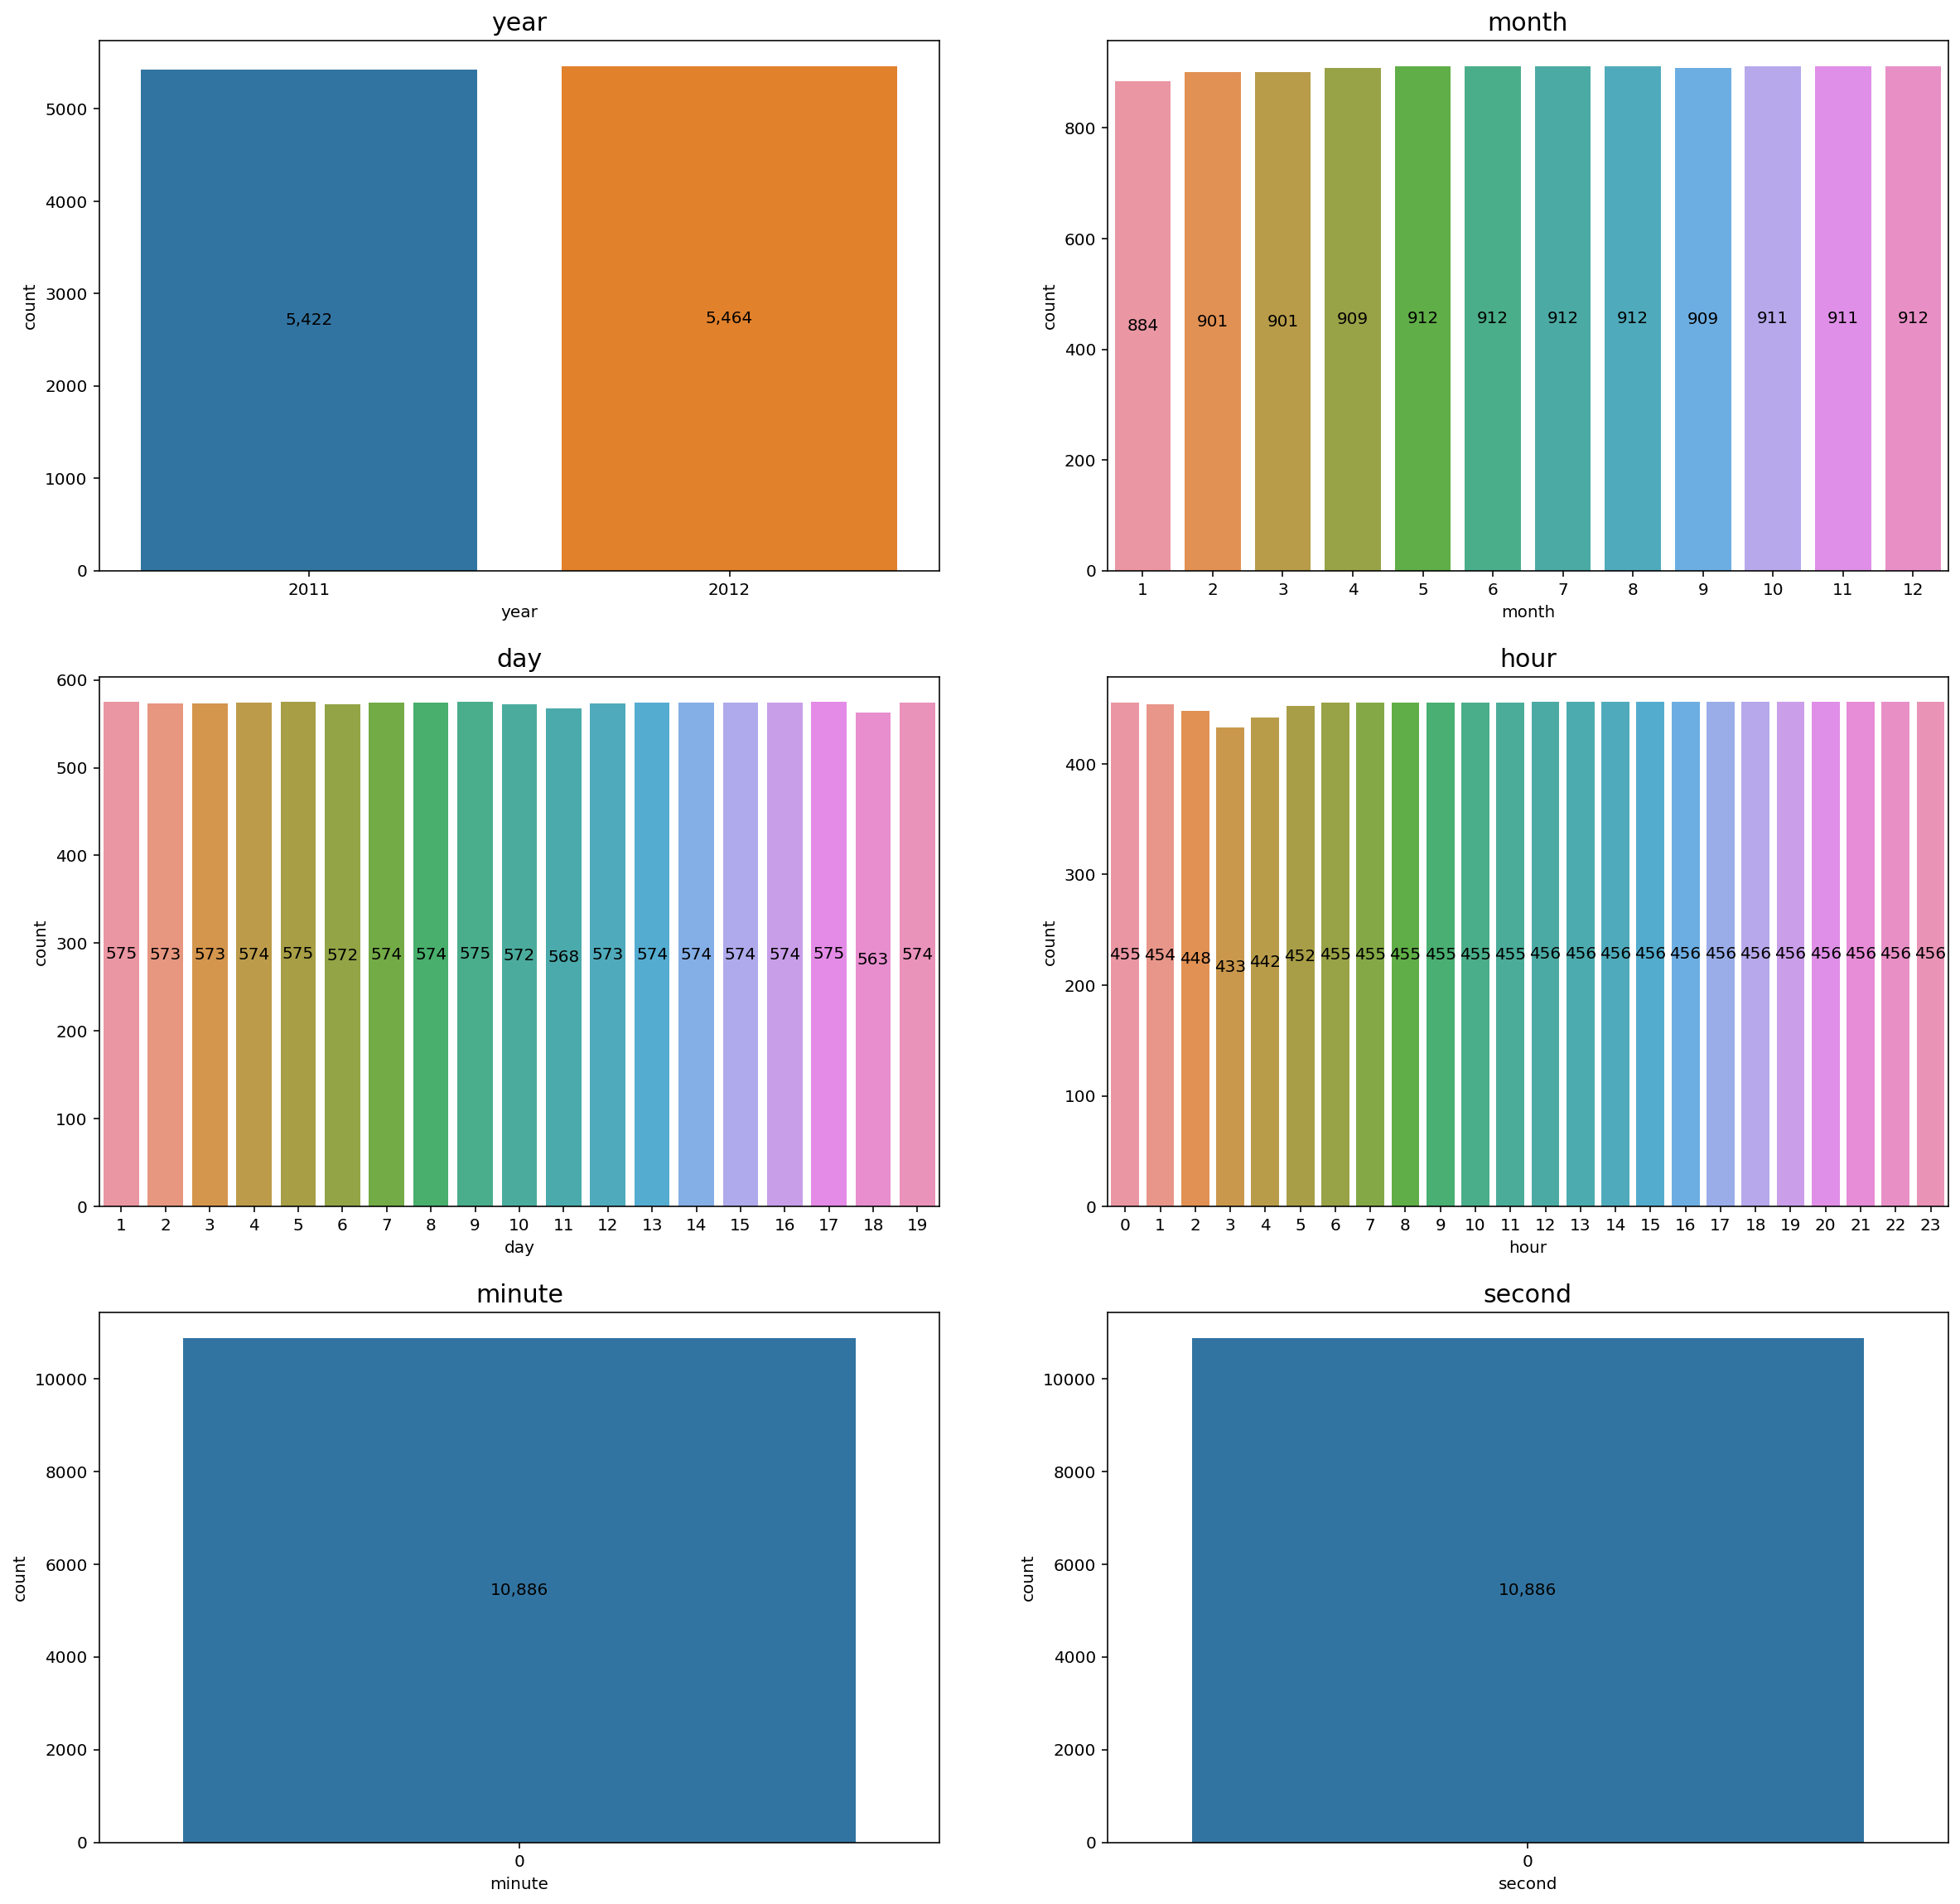

In [305]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))                      # plt.subplots로 3,2 양식의 축을 그리고 fig, axs 오브젝트 반환

col_name = ['year', 'month', 'day', 'hour', 'minute', 'second']      # 그림 그릴 컬럼명 리스트

i = 0
for row in range(3):
    for col in range(2):
        sns.countplot(data=train, x=train[col_name[i]], ax=axs[row][col])      # 각 축에 해당하는 곳에 countplot 그림 
        axs[row][col].set_title(col_name[i], fontsize=15)                      # 제목 달기 
        container = axs[row][col].containers                                   # 컨데이너 객체 생성
        print(container)
        axs[row][col].bar_label(container[0], labels=[f'{x:,.0f}' for x in container[0].datavalues], label_type='center')  # 라벨 넣기
        i += 1

plt.show()


In [306]:
# 위 그래프 그릴때 사용한 코드
# 개인적으로 해석하기 위해 적어놓은 것입니다
axs[0][0].containers[0]

<BarContainer object of 2 artists>

해석 : minute과 second는 0만 존재하므로 데이터 전처리할 때 빼줄것이다

In [309]:
# 단순 DataFrame 확인용 셀
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


# 5. 데이터 전처리 and 데이터 분할

## 5.1 데이터 전처리

In [311]:
# 지울 컬럼명 리스트
X_columns = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']
   
X = train[X_columns].values                                                                 # 비회원과 회원 정보, 분과 초, datetime를 지우고 DataFrame의 값을 ndarray로 변환 후 X에 할당
                                                                                            # datatime의 년, 월, 일, 시, 분, 초를 각 컬럼에 추가했으니 필요없는 정보라 지웠다
y = train['count'].values                                                                   # 정답지인 대여수 count의 값을 ndarray로 변환후 y에 할당

In [321]:
# 데이터 간단 확인
print("X :")
print(X)
print(X.shape)

print("y :")
print(y)
print(y.shape)

X :
[[ 1.  0.  0. ...  1.  1.  0.]
 [ 1.  0.  0. ...  1.  1.  1.]
 [ 1.  0.  0. ...  1.  1.  2.]
 ...
 [ 4.  0.  1. ... 12. 19. 21.]
 [ 4.  0.  1. ... 12. 19. 22.]
 [ 4.  0.  1. ... 12. 19. 23.]]
(10886, 12)
y :
[ 16  40  32 ... 168 129  88]
(10886,)


## 5.2 데이터 분할

In [312]:
''' 전체 데이터를 모두 학습시키는데 사용하면 테스트용 데이터가 없으므로 데이터의 일부는 테스트용으로 떼어놓는다
    breast_cancers_data 데이터셋을 X_train, X_test(20%) 떼어두고, breast_cancers_label 데이터셋을 y_train, y_test(20%) 떼어 놓는다
    
    테스트 사이즈 0.2라는 의미는 20%를 떼어 놓겠다는 의미
    
    random_state는 데이터 분할하기 전에 임의로 돌려서 분할한다는 의미이며 숫자는 램덤 시드값.
    train_test_split 인자중 shuffle=True이므로 랜덤 씨드값만 부여하면 됨
    사용 이유는 데이터가 날짜, 월, 시즌 등 일렬로 존재하기 떄문에 랜덤으로 썪어줘야 균일한 학습할 수 있음
    '''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

X_train.shape, y_train.shape                     # train 데이터는 전체 데이터의 80% 차지
X_test.shape, y_test.shape                       # test 데이터는 전체 데이터의 20% 차지

((2178, 12), (2178,))

# 6. Linear Regression 모델 학습

In [238]:
LinReg_model = LinearRegression()          # Linear Regression Regressor 객체 생성

LinReg_model.fit(X_train, y_train)         # train 데이터셋으로 Linear Regression 모델 지도학습(fitting)

LinearRegression()

# 7. 모델 예측값 및 손실함수(RMSE, MSE) 계산

In [239]:
# 테스트 문제지로 모델의 예측값 출력
y_pred = LinReg_model.predict(X_test)
y_pred

array([356.917821  , 209.03407989, 178.27234862, ..., 229.62702921,
       291.14188512,  -1.34702627])

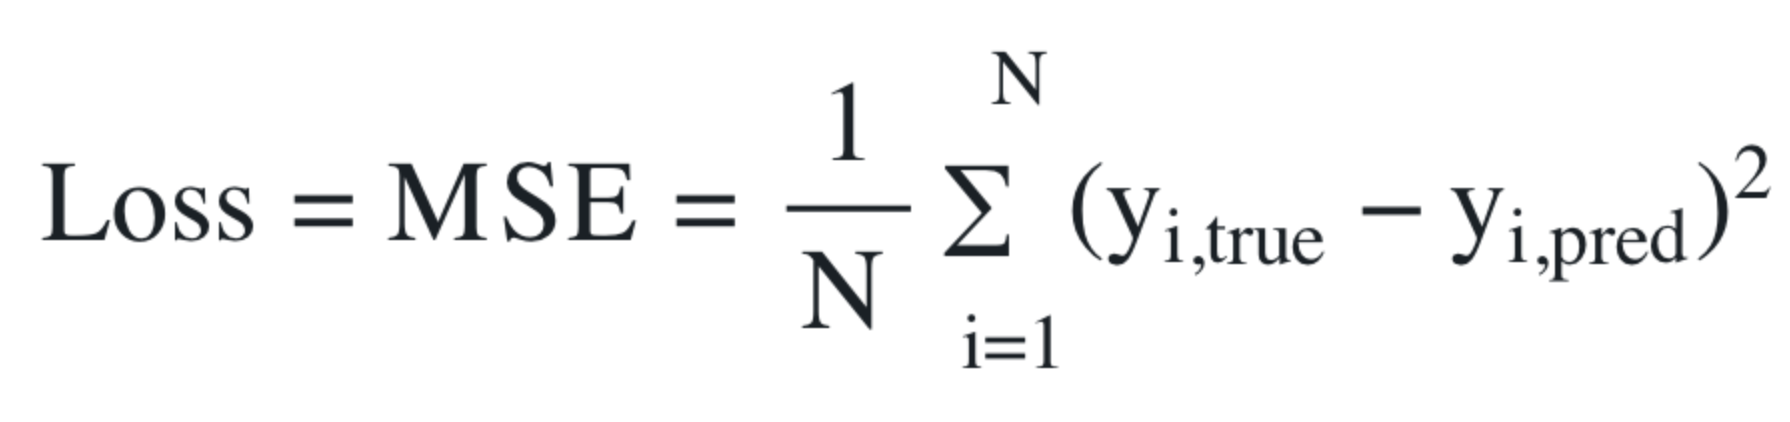

In [322]:
# 손실함수 자체가 MSE 또는 RMSE이기 때문에 "모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기"와 "mse 값과 함께 rmse 값도 계산하기" 같은 말이다
# 따라서 아래에 MSE, RMSE 계산한 것만 나타냈다

MSE = mean_squared_error(y_pred, y_test)                  # MSE 계산
RMSE = mean_squared_error(y_pred, y_test, squared=False)  # RMSE 계산                          

print("MSE :", MSE)                                       # MSE의 값은 20086.11
print("RMSE :", RMSE)                                     # RMSE의 값은 141.72

MSE : 20086.110061742667
RMSE : 141.7254742865328


# 8. 시각화

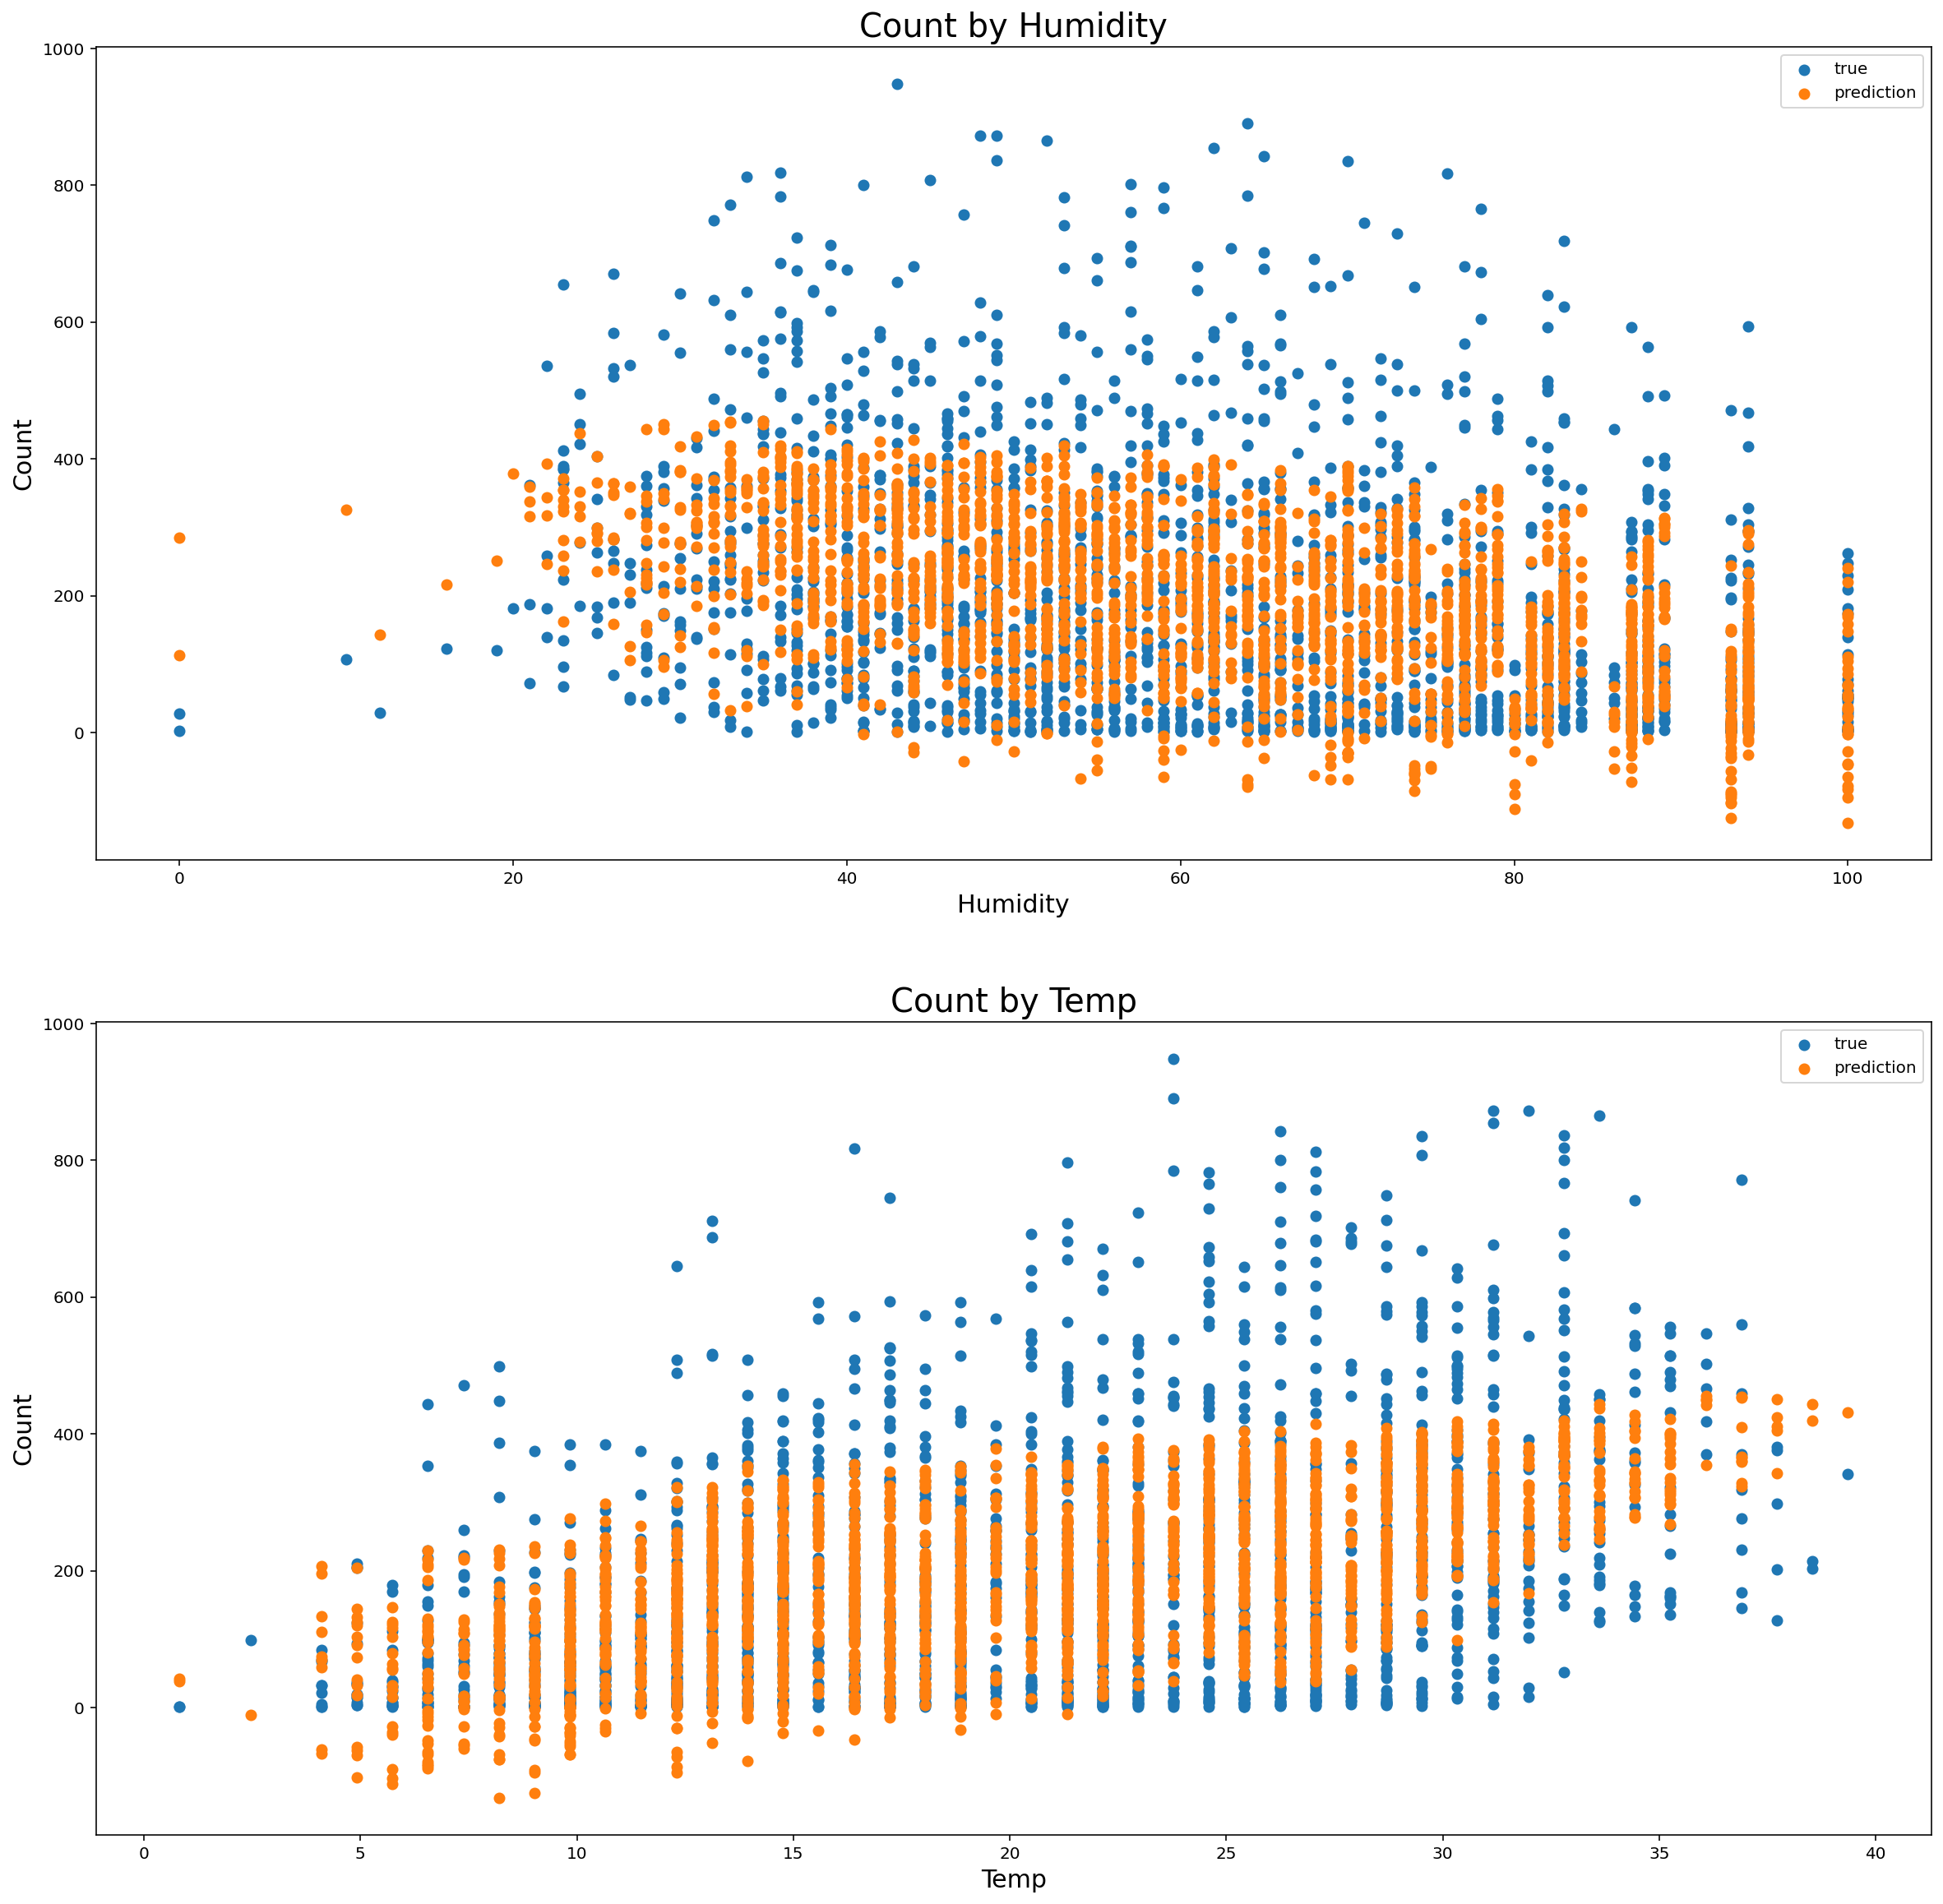

In [272]:
# Humidity
fig = plt.figure(figsize=(20, 20))                             # 도화지 준비
 
plt.subplot(211)                                               # 2 x 1행렬의 1번 인덱스에 축 그리기
plt.scatter(X_test[:, 6], y_test, label='true')                # 상대습도 대비 실제 대여수
plt.scatter(X_test[:, 6], y_pred, label='prediction')          # 상대습도 대비 예측 대여수
plt.xlabel("Humidity", size=15)                                # x축 라벨
plt.ylabel("Count", size=15)                                   # y축 라벨
plt.title("Count by Humidity", size=20)                        # 제목
plt.legend()                                                   # 범례

# Temp                                           
plt.subplot(212)                                               # 2 x 1행렬의 2번 인덱스에 축 그리기
plt.scatter(X_test[:, 4], y_test, label='true')                # 섭씨 온도 대비 실제 대여수
plt.scatter(X_test[:, 4], y_pred, label='prediction')          # 섭씨 온도 대비 예측 대여수
plt.xlabel("Temp", size=15)                                    # x축 라벨
plt.ylabel("Count", size=15)                                   # y축 라벨
plt.title("Count by Temp", size=20)                            # 제목
plt.legend()                                                   # 범례

plt.show()                                                     # 지금까지 설정한 plt들을 한 번에 그리기

# 최종 결과 해석
## 어떤 모델이 가장 좋은 성능을 보이는가? 
선형 회귀 모델

## 모델 성능 평가 지표로 무엇으로 설정하겠는가?
손실함수 MSE와 RMSE를 선정하여 모델 성능 평가를 진행했습니다

## sklearn.metrics에서 제공하는 평가지표 선정하고 선택한 이유?
- 선형회귀 문제이므로 손실함수를 계산해야 했고 그중 MSE와 RMSE를 선정하여 계산하였다

# 회고


1. 이번 프로젝트에서 어려웠던 점 ######################################
    -  노드를 진행할 때는 그래프 그리는 것이 따라 하면서 했기 때문에 익숙하지가 않았다. 그러나 이번에 익스 진행하면서 직접 그래프를 구현해야 하니까
    생각대로 잘 되지 않았지만 공식 문서에 있는 예제와 설명을 읽고 해결하였다
    
2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
    - sklearn.metrics로 제공하는 mean_squared_error의 squared 인자를 False로 하면 RMSE의 값을 도출한다는 사실을 알게 되었습니다
    - 그러나 직접  rmse = (((a - b) ** 2).mean()) ** 0.5 공식으로 계산하면 float에러가 발생한다... 그 이유를 찾아봤는데 이해하지 못하였다.. 시간 날때 한 번 더 찾아볼것이다
    
3. 루브릭 평가 지표를 맞추기 위해 시도한 것들  
   -  RMSE 결과값 141로 루브릭 기준값 150 이하를 달성함
   -  각 프로젝트마다 시각화를 하였습니다  
    
4. 만약에 루브릭 평가 관련 지표를 달성 하지 못했을 때, 이유에 관한 추정  
    - 달성함
    
5. 자기 다짐
    - 그래프 그리는 연습이 필요하다
    - 에러 발생에 대한 해결방법을 찾는 능력이 부족하다
    



# 제출시 주의 사항

- 정량 평가의 경우 (e.g. acc 80% 이상)은 정확히 해당 지표를 맞추어야 합니다.
- 다음의 경우는 **미평가**가 될 수 있습니다.
    - **코드만 있고 결과물이 없는 경우**
        - **코드에 대한 설명이 없는 경우**
        - **회고가 없는 경우**
    - **깃헙 링크가 잘못되어 열람이 안되는 경우**
        - **(중요) 링크를 제출하기 전에 해당 링크에서 프로젝트가 잘 열리는지 꼭 확인해주세요.**
        - 만약 프로젝트의 용량이 커서 프로젝트 로딩이 안된다면 **nbviewer 링크**를 제출해주세요.
